In [3]:
from pathlib import Path
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
LOG_PATH = Path('.') / 'solutions'

In [5]:
pattern = (
    r'Workflow discovery - length (?P<step>\d+)'
    + r'.*?Total problem setup time: (?P<setup_t>\d+\.\d+) sec \((?P<clauses>\d+) clauses\)'
    # + r'.*?Found \d+ solutions. Solving time: (?P<solving_t>\d+\.\d+) sec.'
)

In [185]:
stats_dict = []
for dims in [1, 2, 3, 4]:
    for cols in [10, 20, 41, 83]:
        log_file = LOG_PATH / f'log_DIM_{dims}_COLS_{cols}.txt'
        try:
            with open(log_file, 'r', encoding='utf-8') as log_f:
                content = log_f.read()
        except FileNotFoundError:
            print(f'log file {log_file} not found')
            continue
        print(f'log file {log_file} found')
        regex = re.compile(pattern, re.S)
        for match in regex.finditer(content):
            stats_dict.append(pd.Series({
                'dims': dims,
                'cols': cols,
                'step': int(match.group('step')),
                'setup_t': float(match.group('setup_t')),
                'clauses': int(match.group('clauses')),
                # 'solving_t': float(match.group('solving_t')),
            }))
stats_df = pd.concat(stats_dict, axis=1).T.astype({
    'dims': 'int',
    'cols': 'int',
    'step': 'int',
    'setup_t': 'float',
    'clauses': 'int',
    # 'solving_t': 'float',
})
stats_df['tools'] = stats_df.dims.map({1: 655, 2: 1360, 3: 4510, 4: 11847})
stats_df['types'] = stats_df.dims.map({1: 105, 2: 1155, 3: 18480, 4: 277200})

log file solutions/log_DIM_1_COLS_10.txt found
log file solutions/log_DIM_1_COLS_20.txt found
log file solutions/log_DIM_1_COLS_41.txt found
log file solutions/log_DIM_1_COLS_83.txt found
log file solutions/log_DIM_2_COLS_10.txt found
log file solutions/log_DIM_2_COLS_20.txt found
log file solutions/log_DIM_2_COLS_41.txt found
log file solutions/log_DIM_2_COLS_83.txt found
log file solutions/log_DIM_3_COLS_10.txt found
log file solutions/log_DIM_3_COLS_20.txt found
log file solutions/log_DIM_3_COLS_41.txt found
log file solutions/log_DIM_3_COLS_83.txt found
log file solutions/log_DIM_4_COLS_10.txt found
log file solutions/log_DIM_4_COLS_20.txt not found
log file solutions/log_DIM_4_COLS_41.txt not found
log file solutions/log_DIM_4_COLS_83.txt not found


In [7]:
sns.set_theme(style="whitegrid")

In [8]:
colors = sns.color_palette("rocket", 4)
colors

[(0.29977678, 0.11356089, 0.29254823),
 (0.63139686, 0.10067417, 0.35664819),
 (0.90848638, 0.24568473, 0.24598324),
 (0.96298491, 0.6126247, 0.45145074)]

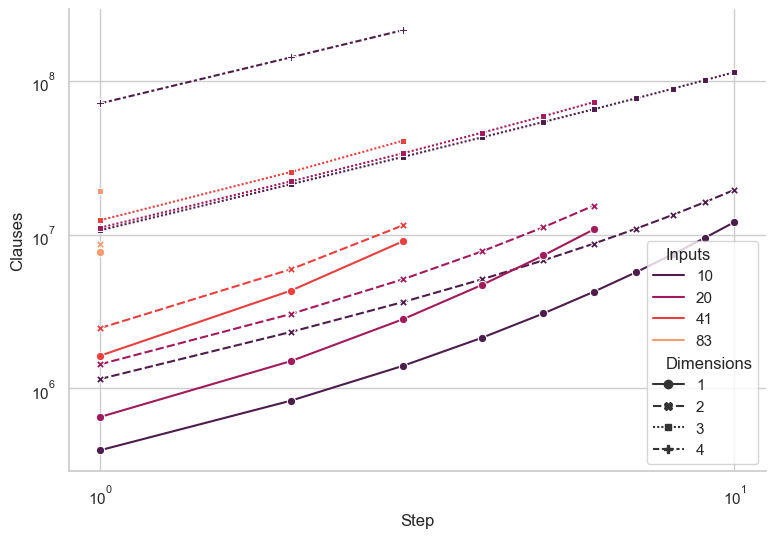

In [339]:
fig, ax = plt.subplots(figsize=(9, 6))
fig_df = stats_df.copy().rename(columns={'cols': 'Inputs', 'dims': 'Dimensions'})
sns.despine(fig)
sns.lineplot(data=fig_df, x='step', y='clauses', hue='Inputs', style='Dimensions', palette=colors, markers=True, ax=ax)
ax.set(xlabel='Step', ylabel='Clauses')
ax.set_xticks(range(1, int(max(stats_df['step'])) + 1))
plt.yscale('log')
plt.xscale('log')
# plt.legend(loc='upper right');
plt.savefig('complexity_left.png', dpi=300, bbox_inches='tight')

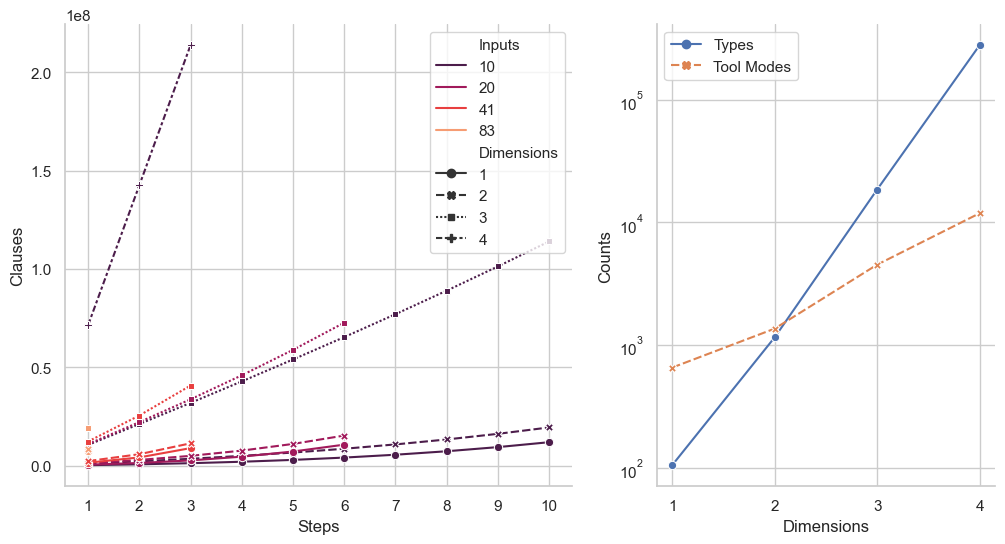

In [327]:
dimensions_data = {
    'Dimensions': [1, 2, 3, 4],
    'Types': [105, 1155, 18480, 277200],
    'Tool Modes': [655, 1360, 4515, 11847]
}
dim_df = pd.DataFrame(dimensions_data).melt(id_vars='Dimensions', var_name='', value_name='Counts')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=False, sharey=False, width_ratios=[3, 2])
sns.despine(fig)
sns.lineplot(x='Dimensions', y='Counts', hue='', data=dim_df, ax=ax2, markers=True, style='')
ax2.set_xticks(dim_df['Dimensions'].unique())
plt.yscale('log')

fig_df = stats_df.copy().rename(columns={'cols': 'Inputs', 'dims': 'Dimensions'})
sns.despine(fig)
sns.lineplot(data=fig_df, x='step', y='clauses', hue='Inputs', style='Dimensions', palette=colors, markers=True, ax=ax1)
ax1.set(xlabel='Steps', ylabel='Clauses')
ax1.set_xticks(range(1, int(max(stats_df['step'])) + 1))
ax1.legend(loc='upper right')

plt.savefig('complexity.png', dpi=300, bbox_inches='tight')

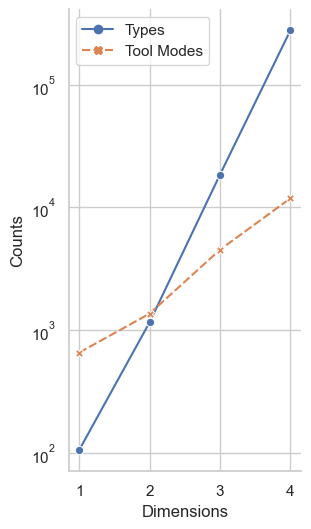

In [333]:
dimensions_data = {
    'Dimensions': [1, 2, 3, 4],
    'Types': [105, 1155, 18480, 277200],
    'Tool Modes': [655, 1360, 4515, 11847]
}
dim_df = pd.DataFrame(dimensions_data).melt(id_vars='Dimensions', var_name='', value_name='Counts')
fig, ax = plt.subplots(figsize=(3, 6))
sns.despine(fig)
sns.lineplot(x='Dimensions', y='Counts', hue='', data=dim_df, ax=ax, markers=True, style='')
ax.set_xticks(dim_df['Dimensions'].unique())
plt.yscale('log')
plt.savefig('complexity_right.png', dpi=300, bbox_inches='tight')

In [188]:
fig_df[['Dimensions', 'Inputs', 'step', 'clauses', 'tools', 'types']].to_csv('temp.csv')

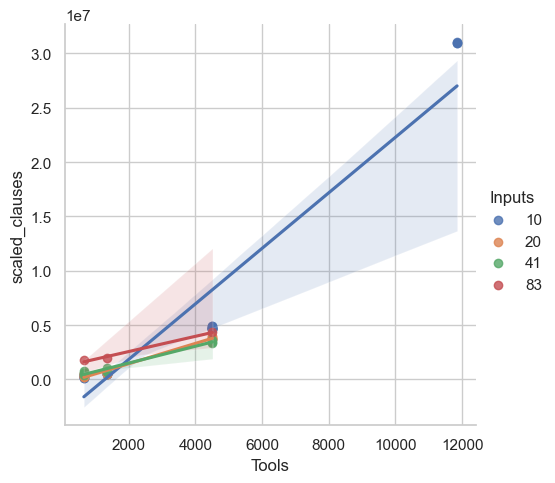

In [189]:
# fig, ax = plt.subplots(figsize=(10, 6))
fig_df = stats_df.copy().rename(columns={'cols': 'Inputs', 'dims': 'Dimensions'})
fig_df['scaled_clauses'] = (fig_df.clauses / (fig_df.Inputs.apply(np.log)*fig_df.step))
fig_df['Tools'] = fig_df.Dimensions.map({1: 655, 2: 1360, 3: 4510, 4: 11847})
# sns.despine(fig)
sns.lmplot(data=fig_df, x='Tools', y='scaled_clauses', hue='Inputs')
# ax.set(xlabel='Tools', ylabel='Clauses / (Inputs * Steps)')
# ax.set_xticks(range(1, int(max(stats_df['step'])) + 1))
# plt.legend(loc='upper right');

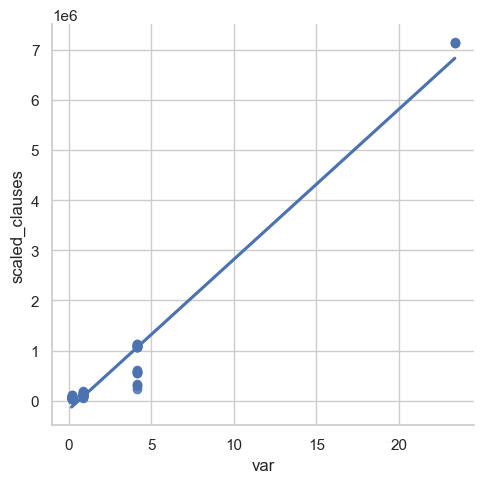

In [288]:
# fig, ax = plt.subplots(figsize=(10, 6))
fig_df = stats_df.copy().rename(columns={'cols': 'Inputs', 'dims': 'Dimensions'})
fig_df['scaled_clauses'] = fig_df.clauses / (fig_df.Inputs * fig_df.step)
fig_df['var'] = (np.log(temp.types / temp.tools) + 3.4) / 1.63
# sns.despine(fig)
sns.lmplot(data=fig_df, x='var', y='scaled_clauses', ci=None)
# ax.set(xlabel='Tools', ylabel='Clauses / (Inputs * Steps)')
# ax.set_xticks(range(1, int(max(stats_df['step'])) + 1))
# plt.legend(loc='upper right');

In [190]:
temp = stats_df.copy()

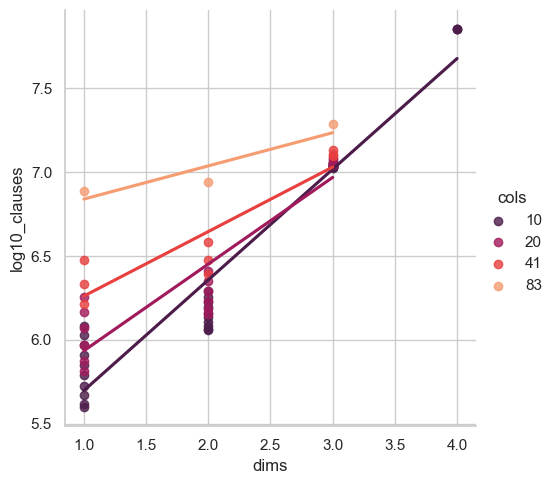

In [346]:
temp['log10_clauses'] = np.log10(temp['scaled_clauses'])
sns.lmplot(data=temp, x='dims', y='log10_clauses', hue='cols', ci=None, palette=colors)
# plt.yscale('log')

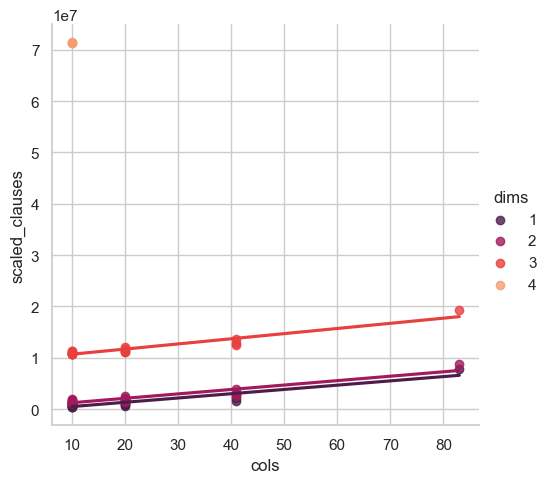

In [345]:
temp['scaled_clauses'] = temp['clauses'] / temp['step']
sns.lmplot(data=temp, x='cols', y='scaled_clauses', hue='dims', ci=None, palette=colors)

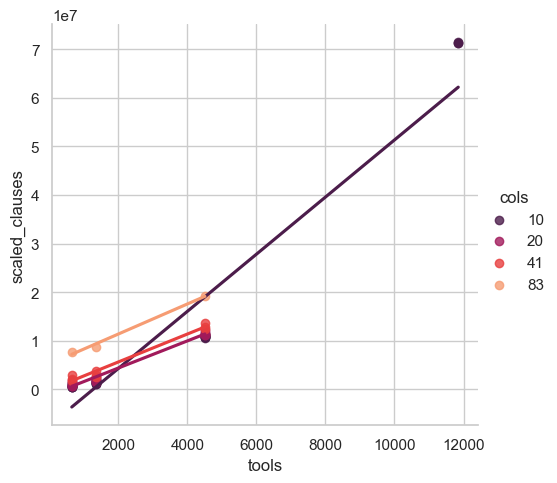

In [192]:
sns.lmplot(data=temp, x='tools', y='scaled_clauses', hue='cols', ci=None, palette=colors)

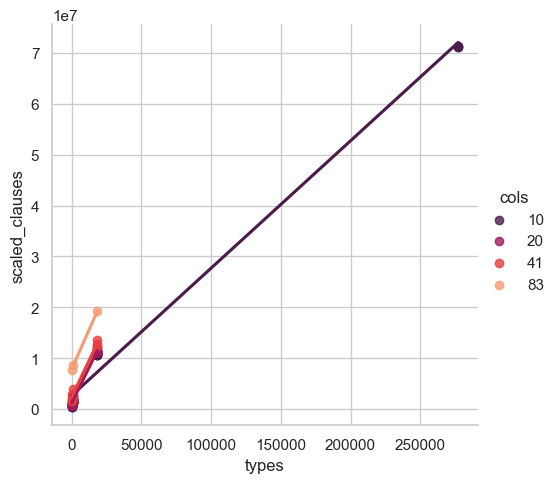

In [196]:
sns.lmplot(data=temp, x='types', y='scaled_clauses', hue='cols', ci=None, palette=colors)

In [284]:
temp.dims * 1.63 - 3.4 - np.log(temp.types / temp.tools)

0     0.060675
1     0.060675
2     0.060675
3     0.060675
4     0.060675
        ...   
58    0.079608
59    0.079608
60   -0.032665
61   -0.032665
62   -0.032665
Length: 63, dtype: float64

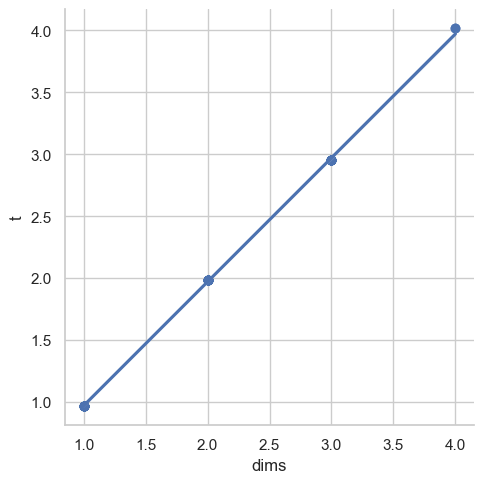

In [281]:
temp['t'] = (np.log(temp.types / temp.tools) + 3.4) / 1.63
sns.lmplot(data=temp, x='dims', y='t')

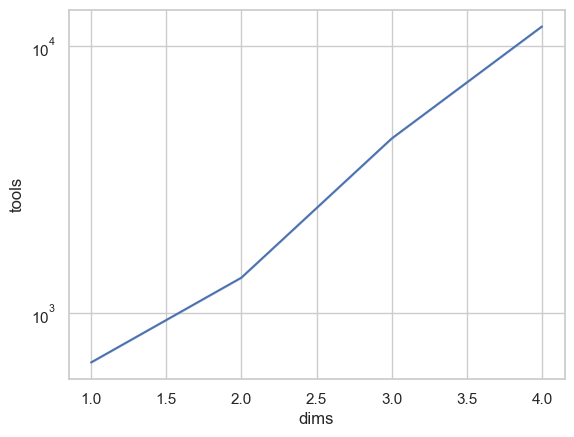

In [83]:
sns.lineplot(data=temp, x='dims', y='tools')
plt.yscale('log')

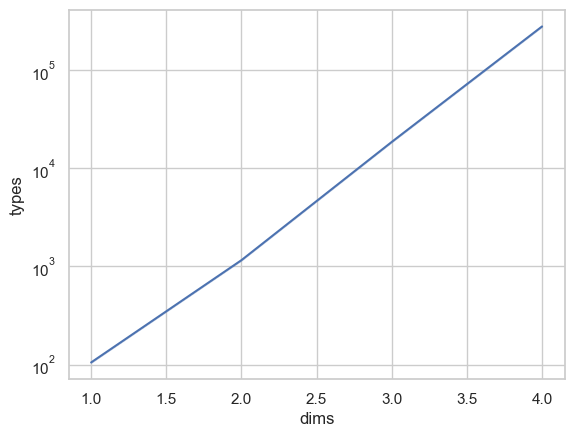

In [194]:
sns.lineplot(data=temp, x='dims', y='types')
plt.yscale('log')

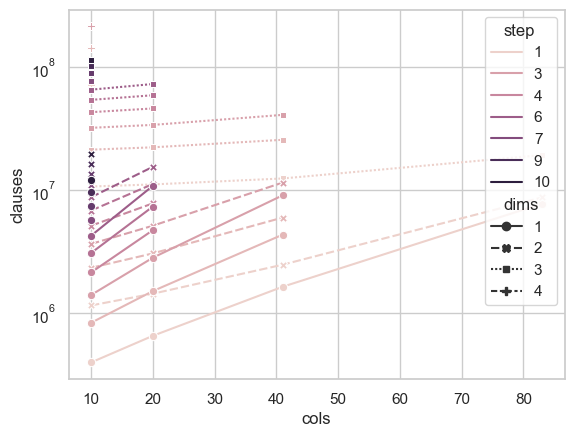

In [14]:
sns.lineplot(data=stats_df, x='cols', y='clauses', hue='step', style='dims', markers=True)
plt.yscale('log')

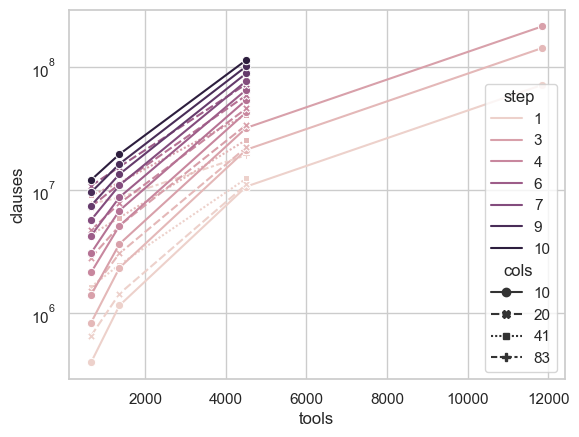

In [72]:
sns.lineplot(data=temp, x='tools', y='clauses', hue='step', style='cols', markers=True)
plt.yscale('log')

/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


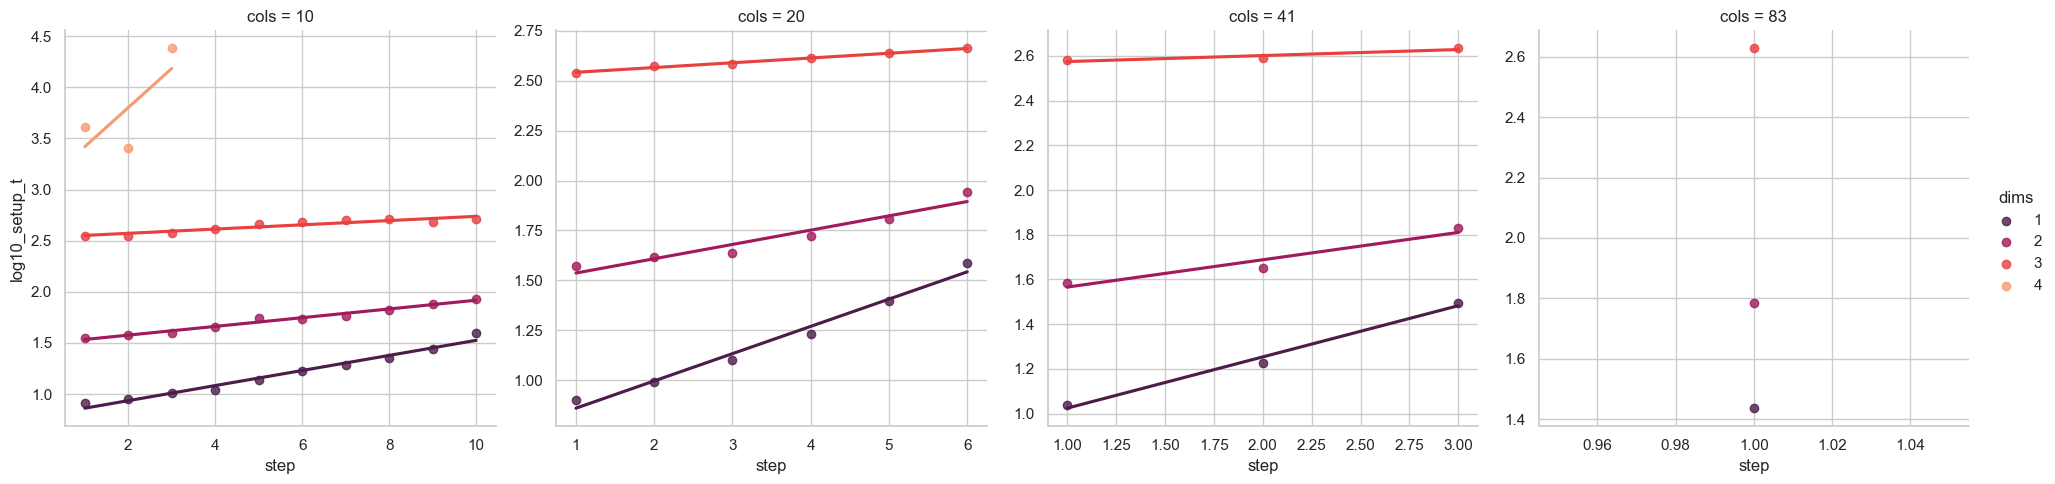

In [35]:
temp['log10_setup_t'] = temp['setup_t'].apply(np.log10)
sns.lmplot(data=temp, x='step', y='log10_setup_t', hue='dims', col='cols', palette=colors, sharey=False, sharex=False, ci=None)

/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/stevep/opt/anaconda3/envs/APE/lib/python3.10/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


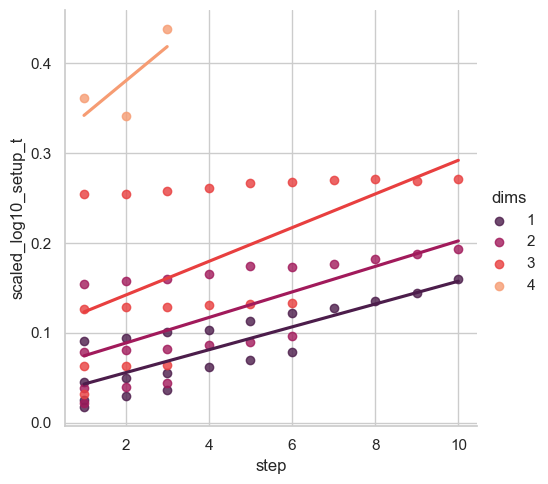

In [39]:
temp['scaled_log10_setup_t'] = temp['setup_t'].apply(np.log10) / temp['cols']
sns.lmplot(data=temp, x='step', y='scaled_log10_setup_t', hue='dims', palette=colors, sharey=False, sharex=False, ci=None)

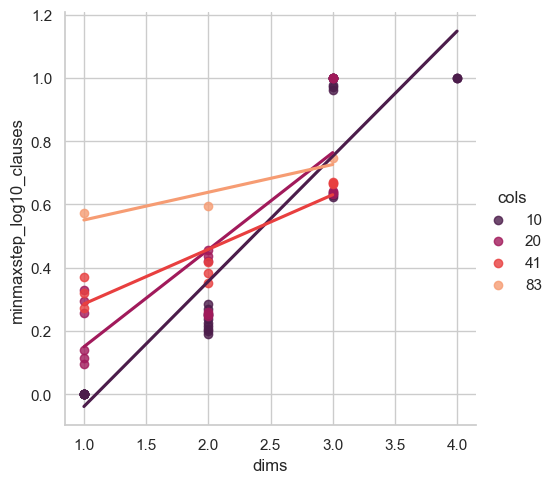

In [52]:
temp['log10_clauses'] = temp.clauses.apply(np.log10)
temp['minmaxstep_clauses'] = temp.groupby(['step'], group_keys=False)['clauses'].apply(lambda x: (x-x.min())/(x.max()-x.min()))
sns.lmplot(data=temp, x='dims', y='minmaxstep_log10_clauses', hue='cols', palette=colors, ci=None)

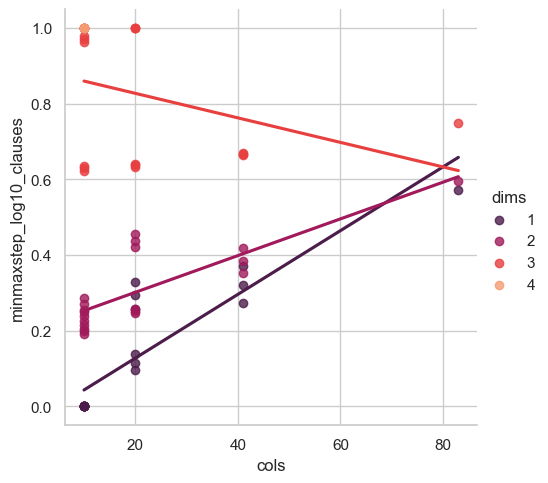

In [53]:
sns.lmplot(data=temp, x='cols', y='minmaxstep_log10_clauses', hue='dims', palette=colors, ci=None)